In [2]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
import matplotlib as mpl
mpl.style.use('seaborn-colorblind')
mpl.rcParams["font.family"] = "Times New Roman"

rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150
rcParams["xtick.direction"] = "in"
rcParams["ytick.direction"] = "in"
rcParams["xtick.top"] = True
rcParams["ytick.right"] = True
rcParams["font.size"] = 11

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("hd186255_all-seconds-with-uncertainties.txt", 
                 usecols=["time","tau2","tau2_err","tau5","tau5_err","tau8","tau8_err"])[:-1]

In [55]:
av = pd.read_csv("hd186255_unwrapped_time_delay.csv",names=["t","tau","err"],skiprows=1)[:-1]
av["time"] = av["t"] + 54974.50404

In [56]:
rcParams["font.family"] = "serif"

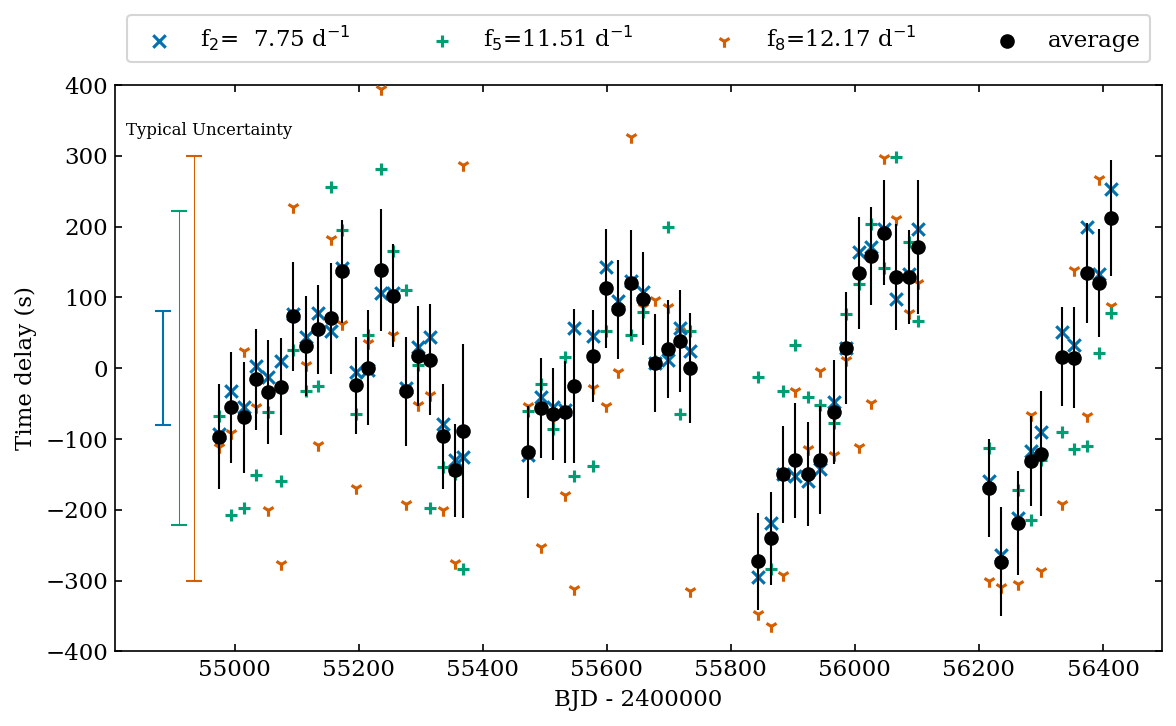

In [93]:
plt.figure(figsize=[9,5])
colournum = 5
markersize= 36
plt.scatter(df["time"],df["tau2"],label=r"f$_2$=  7.75 d$^{-1}$",marker="x",zorder=8,
            s=markersize)
plt.scatter(df["time"],df["tau5"],label=r"f$_5$=11.51 d$^{-1}$",marker="+",zorder=7,
            s=markersize)
plt.scatter(df["time"],df["tau8"],label=r"f$_8$=12.17 d$^{-1}$",marker="1",zorder=6,
            s=markersize)
plt.scatter(av["time"],av["tau"], label="average", c='k',zorder=10)

legend1 = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), mode='expand',ncol=4,loc=3)

e1 = plt.errorbar(df["time"][0]-90,0,np.nanmedian(df["tau2_err"]),fmt="none",elinewidth=1.0,zorder=8,
            markeredgewidth=1,capsize=4)
e2 = plt.errorbar(df["time"][0]-90+25,0,np.nanmedian(df["tau5_err"]),fmt="none",elinewidth=0.5,zorder=7,
            markeredgewidth=1,capsize=4)
e3 = plt.errorbar(df["time"][0]-90+50,0,np.nanmedian(df["tau8_err"]),fmt="none",elinewidth=0.5,zorder=6,
            markeredgewidth=1,capsize=4)
plt.errorbar(av["time"],av["tau"],av["err"],fmt="none",elinewidth=1.0,zorder=9,c='k')

plt.ylabel("Time delay (s)")
plt.xlabel("BJD - 2400000")

plt.ylim(-400,400)
plt.text(54825,330,'Typical Uncertainty',fontsize=8)
# plt.title('HD 186255 Time Delays',y=1.15)

plt.savefig("../paper/HD186255_time_delay.png",bbox_inches='tight')
plt.savefig("../paper/HD186255_time_delay.pdf",bbox_inches='tight')